# NIGERIAN BREWERIES

Nigerian Breweries Plc is a Nigeria-based brewing company. The Company is engaged in brewing, marketing, and selling of lager, stout, non-alcoholic malt drinks and soft drinks. The Company's brands include Star lager beer; Gulder lager beer; Maltina, which is a nourishing malt drink; Legend Extra Stout; Amstel Malta; Heineken lager beer; Maltina Sip-it; Fayrouz, which is a non-alcoholic soft drink; Climax, a herbal energy drink; Goldberg lager; Malta Gold; Life Continental lager; Ace Passion; Star Lite and Star Radler, among others. Its products include 33 Export lager beer, Williams dark ale, Turbo Kings dark ale, More lager beer, malt drinks, Maltina Pineapple, Maltina Vanilla, Amstel Malta Ultra, Star Radler Red Fruits, and Desperados, which is a premium beer brand with a distinctive tequila flavor. The Company also focuses on ancillary business, which includes manufacturers of bottles, cans, crown corks, labels, cartons, and plastic crates. The Company also has an export business.

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from itertools import combinations
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
import statsmodels.api as sm
import statsmodels.tsa.api as smt

## Reading the data

In [15]:
df = pd.read_csv('NB Historical Data(7).csv')

In [16]:
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,11/21/2023,39.0,39.0,39.0,37.55,279.13K,0.00%
1,11/20/2023,39.0,40.0,39.0,39.00,5.42M,-2.50%
2,11/17/2023,40.0,40.0,39.0,38.50,442.82K,0.00%
3,11/16/2023,40.0,38.0,40.0,38.00,2.75M,5.26%
4,11/15/2023,38.0,38.0,38.0,38.00,1.55M,0.00%


##  Understanding the data

1. The 'Date' column represents the date of the stock price data.

2. The 'Price' column represents the stock price for the corresponding date.

3. The 'Open' column represents the opening price of the stock on the given date.

4. The 'High' column represents the highest price of the stock during the trading day.

5. The 'Low' column represents the lowest price of the stock during the trading day.

6. The 'Vol.' column represents the trading volume, indicating the total number of shares traded on the given date.

7. The 'Change%' column represents the percentage change in the stock price compared to the previous day.

In [17]:
df.shape

(1460, 7)

The dataset has over 1460 rows and 7 columns.

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1460 non-null   object 
 1   Price     1460 non-null   float64
 2   Open      1460 non-null   float64
 3   High      1460 non-null   float64
 4   Low       1460 non-null   float64
 5   Vol.      1460 non-null   object 
 6   Change %  1460 non-null   object 
dtypes: float64(4), object(3)
memory usage: 80.0+ KB


Date here is recognized as an object data type and not as dates. Thus, we need pandas to_datetime() feature which converts the arguments to dates.

In [19]:
df.describe()

,Price,Open,High,Low
count,1460.000000,1460.000000,1460.000000,1460.000000
mean,49.205445,49.276692,49.382295,48.848171
std,20.420590,20.567710,20.683791,20.188716
min,17.600000,17.600000,17.600000,17.600000
25%,38.075000,38.000000,38.320000,37.840000
50%,41.600000,41.600000,41.600000,41.200000
75%,50.400000,50.400000,50.400000,50.400000
max,122.140000,127.200000,124.000000,120.840000


In [20]:
df.columns.to_list()

['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %']

#### We visualize the Price and Volume of NB shares.

<AxesSubplot:>

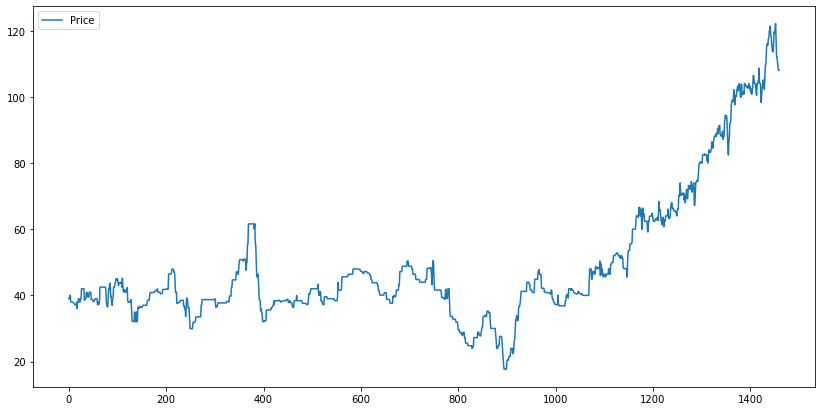

In [21]:
df[['Price']].plot(figsize = (14,7))

__Volume here is recognized as an object data type and not as float(number). Thus, we need to convert it to float__

In [22]:
df['Vol.'] = df['Vol.'].replace('[KMB]', '', regex=True).replace('', '1', regex=True).astype(float) * \
              df['Vol.'].str.extract(r'[\d\.]+([KMB])', expand=False).fillna(1).replace(['K','M','B'], [10**3, 10**6, 10**9]).astype(int)

This code removes 'K', 'M', or 'B' from the 'Vol.' column, converts the column to numeric values, and then multiplies by the appropriate factor to get the float values. Note that this assumes that the 'Vol.'

<AxesSubplot:>

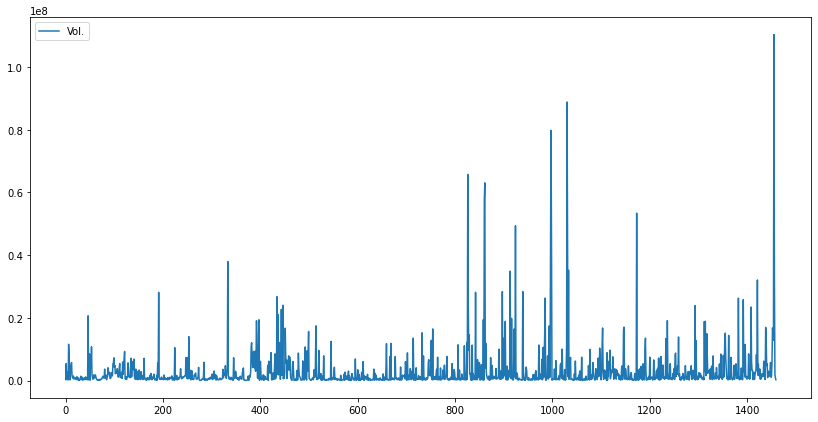

In [23]:
df[['Vol.']].plot(figsize = (14,7))

Create a copy of the dataset in order to protect the original

In [24]:
data = df.copy()

data.to_csv('NB_data.csv', index = False)

__Convert the 'Date' Column and set as the index since we are working with a time series.__

In [13]:
data['Date'] = pd.to_datetime(df['Date'])
data.set_index('Date', inplace=True)

In [14]:
data.head()

__Subsetting Data Using Pandas Dataframes__

Instead of working with the entire data, we will work with the Price and Volume. It is possible to slice the Time Series data to highlight the portion of the data we are interested in, hence working with a selected column becomes easier. Further, we will plot the month-wise trend of various years and analyse how it impacted the Prices of NB stock as well as the Volume.

In [14]:
df_T = df[['Date', 'Price', 'Vol.']]

In [15]:
df_T.head()

,Date,Price,Vol.
0,11/21/2023,39.0,279130.0
1,11/20/2023,39.0,5420000.0
2,11/17/2023,40.0,442820.0
3,11/16/2023,40.0,2750000.0
4,11/15/2023,38.0,1550000.0


In [16]:
df_T['Date'] = pd.to_datetime(df_T['Date'])
df_T.set_index('Date', inplace=True)

C:\Users\GODIAN\AppData\Local\Temp\ipykernel_16036\3117106504.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_T['Date'] = pd.to_datetime(df_T['Date'])


In [17]:
df_T.head()

,Price,Vol.
Date,,
2023-11-21,39.0,279130.0
2023-11-20,39.0,5420000.0
2023-11-17,40.0,442820.0
2023-11-16,40.0,2750000.0
2023-11-15,38.0,1550000.0


<AxesSubplot:xlabel='Date'>

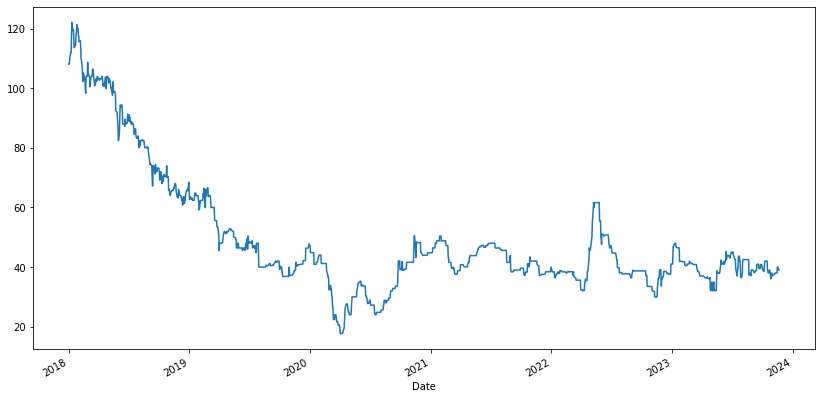

In [18]:
df_T['Price'].plot(figsize = (14,7))

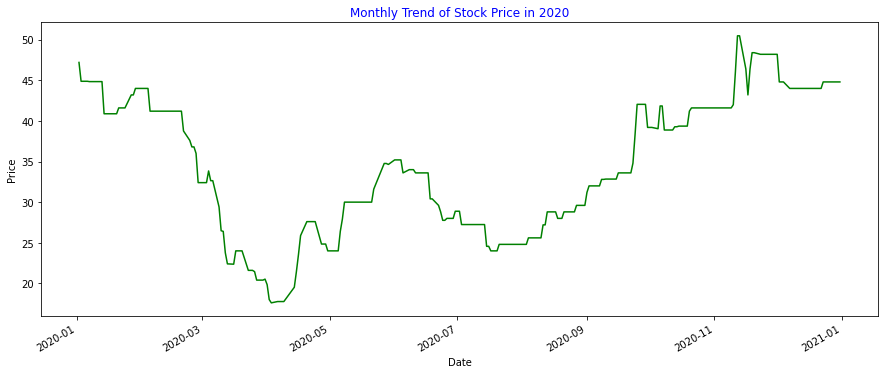

In [19]:
ax = df_T.loc['2020', 'Price'].plot(figsize=(15,6), color='g')
ax.set_title('Monthly Trend of Stock Price in 2020', color='b' ); 
ax.set_ylabel('Price');

In [20]:
import matplotlib.dates as mdates

C:\Users\GODIAN\AppData\Local\Temp\ipykernel_16036\4075534566.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  ax = df_T.loc['2020-03':'2020-05', 'Price'].plot(marker = '+',linestyle = '-', figsize = (15,6), color = 'b' )


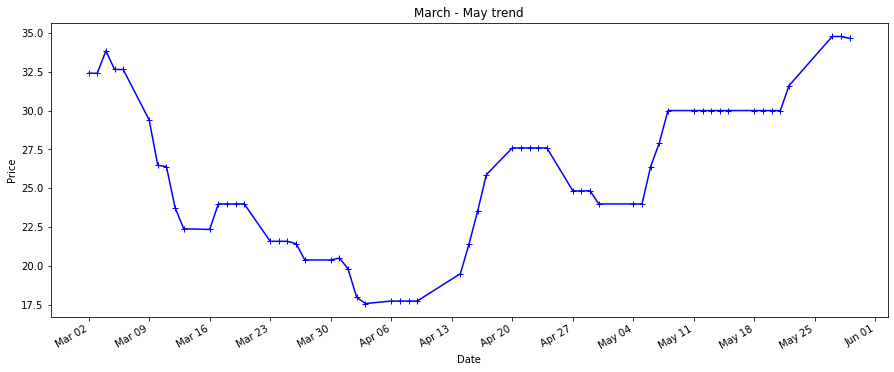

In [21]:
ax = df_T.loc['2020-03':'2020-05', 'Price'].plot(marker = '+',linestyle = '-', figsize = (15,6), color = 'b' )
ax.set_title('March - May trend')
ax.set_ylabel('Price')
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

In [22]:
df_price.reset_index(inplace=True)
df_price['year'] = df_price.Date.dt.year
df_price['month'] = df_price.Date.dt.month
df_price['day'] = df_price.Date.dt.day
df_price['day of week'] = df_price.Date.dt.dayofweek
df_price['Weekday Name'] = df_price.Date.dt.day_name()


#Set Date column as the index column.
df_price.set_index('Date', inplace=True)
df_price.head()

NameError: name 'df_price' is not defined

### Volume Analysis

In [ ]:
df_T['Vol.'].plot(figsize = (14,7))

In [ ]:
ax = df_T.loc['2020', 'Vol.'].plot(figsize=(15,6), color='g')
ax.set_title('Monthly Trend of Stock Volume in 2020', color='b' ); 
ax.set_ylabel('Vol');

## Time Resampling

we use a process called time resampling to aggregate data into a defined time period, such as by month or by quarter. Institutions can then see an overview of stock prices and make decisions according to these trends.

In [ ]:
year_resampling = data.resample(rule = 'A').mean()

In [ ]:
year_resampling.head()

In [ ]:
data['Price'].resample('A').mean().plot(kind='bar', figsize = (15,6), color='b')
plt.title('Yearly Mean Price for NB', color='brown')

In [ ]:
data['Vol.'].resample('A').mean().plot(kind='bar', figsize = (15,6), color='b')
plt.title('Yearly Mean Volume for NB', color='brown')

In [ ]:
week_resampling = data.resample(rule = 'W').mean()

In [ ]:
week_resampling.head()

In [ ]:
week_resampling['Price'].plot(kind='line', figsize = (15,6), color='b')
plt.title('Weekly Mean Price for NB', color='brown')

In [ ]:
week_resampling['Vol.'].plot(kind='line', figsize = (15,6), color='b')
plt.title('Weekly Mean Volume for NB', color='brown')

In [ ]:
month_resampling = data.resample(rule = 'M').mean()

In [ ]:
month_resampling['Price'].plot(kind='bar', figsize = (15,6), color='b')
plt.title('Monthly Mean Price for NB', color='brown')

In [ ]:
month_resampling['Vol.'].plot(kind='bar', figsize = (15,6), color='b')
plt.title('Monthly Mean Volume for NB', color='brown')

In [ ]:
plt.figure(figsize=(14, 7))
plt.scatter(data['Price'], data['Vol.'], alpha=0.5)
plt.title('Correlation between Price and Volume')
plt.xlabel('Price')
plt.ylabel('Volume')
plt.show()


In [23]:
correlation_coefficient = data['Price'].corr(data['Vol.'])
print(f"Correlation Coefficient: {correlation_coefficient}")

Correlation Coefficient: 0.05466929343154238


__Correlation 0.05466929343154238__ could mean the following:

- There is a very weak and insignificant positive correlation between the two datasets.
- Changes in one variable do not affect changes in the other variable very much

### Components of Time Series :

A Time Series consists of the following components :

__Trend :__ Long term direction of the data.


__Seasonality :__ Short term repetitve patterns of the data due to the weather seasons.


__Cyclic Variations :__ Short term repetitive patterns of the data over a period of 1 year.

 

__Irregularities :__ Random and unforseen fluctuations in the data.

 
In order to assess a Time Series, we need to consider the above components and make sure that our data is free from all these components in order to make a forecast.

__To visualize the Price and Volume for the above components, we use a function seasonal_decompose from the statsmodel library.


<Figure size 1008x504 with 0 Axes>

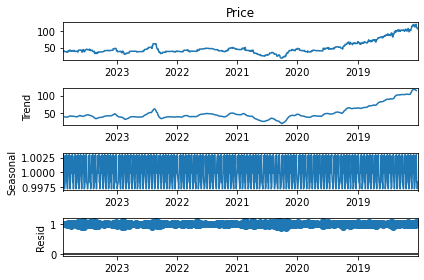

In [24]:
dec = sm.tsa.seasonal_decompose(data['Price'], model='multiplicative', period=12)
plt.figure(figsize=(14, 7))
dec.plot()
plt.show()

__Due to the  large volume of data the we can barely interprete the components for the daily sample of the data and so we need to resample the data to the average value of the Price and Volume per week and per month.__

### Weekly Resampling (Price)

<Figure size 1008x504 with 0 Axes>

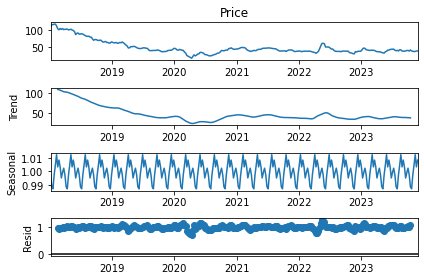

In [25]:
dec = sm.tsa.seasonal_decompose(data['Price'].resample(rule = 'W').mean(), model='multiplicative', period=12)
plt.figure(figsize=(14, 7))
dec.plot()
plt.show()

__Data might have a non-linear downtrend.__

__A seasonal pattern may be present in the data.__

__The last plot is the Residual plot. It is the plot that describes the data if the trend and seasonal components of the data are completely eliminated.__

### Monthly Resampling (Price)

<Figure size 1008x504 with 0 Axes>

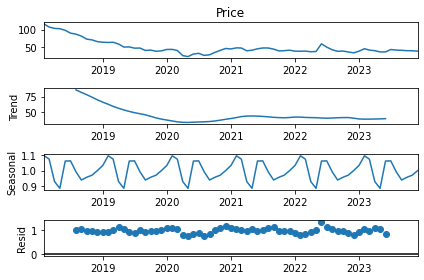

In [26]:
dec = sm.tsa.seasonal_decompose(data['Price'].resample(rule = 'M').mean(), model='multiplicative', period=12)
plt.figure(figsize=(14, 7))
dec.plot()
plt.show()

<Figure size 1008x504 with 0 Axes>

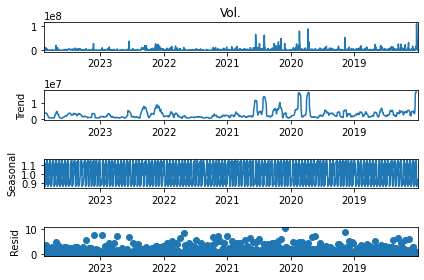

In [27]:
dec = sm.tsa.seasonal_decompose(data['Vol.'], model='multiplicative', period=12)
plt.figure(figsize=(14, 7))
dec.plot()
plt.show()

### Weekly Resampling (Volume)


<Figure size 1008x504 with 0 Axes>

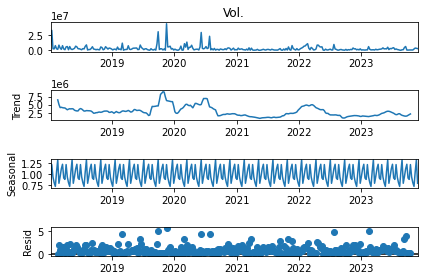

In [28]:
dec = sm.tsa.seasonal_decompose(data['Vol.'].resample(rule = 'W').mean(), model='multiplicative', period=12)
plt.figure(figsize=(14, 7))
dec.plot()
plt.show()

### Monthly Resampling (Volume)

<Figure size 1008x504 with 0 Axes>

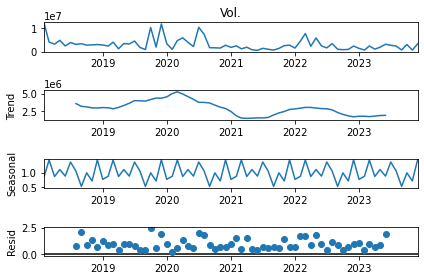

In [29]:
dec = sm.tsa.seasonal_decompose(data['Vol.'].resample(rule = 'M').mean(), model='multiplicative', period=12)
plt.figure(figsize=(14, 7))
dec.plot()
plt.show()


Stationarity :

    Stationarity is a concept for time series where statistical parameters like mean, variance, etc are all constant over time.
    For a time series, features are dependent on time i.e features are a function of time. Statistical paramters will change values over time as they are extracted from the features.
    If the time series is not stationary, then the predictions deviate from the original values and increase the error as we don't know the changes in these statistical parameters as they are a function of time.
    Thus, by making time series stationary, we kind of nullify the effects of statistical parameters on the forecast.
    To test stationarity, we will use Augmented Dickey Fuller Test :
        Null Hypothesis : It assumes that the time series is non-stationary.
        Alternate Hypothesis : If the null hypothesis is rejected, then the time series is stationary.
        Output of the Augmented Dickey Fuller Test include :
            Test Statistic
            p-value
            #Lags Used
            Number of Observations Used
            Critical Value (1%)
            Critical Value (5%)
            Critical Value (10%)
    For the Null Hypothesis to be rejected and accepting that the time series is stationary, there are 2 requirements :
        Critical Value (5%) > Test Statistic
        p-value < 0.05



In [30]:
def test_stationarity(timeseries):
    #Determing rolling statistics
    MA = timeseries.rolling(window = 12).mean()
    MSTD = timeseries.rolling(window = 12).std()

    #Plot rolling statistics:
    plt.figure(figsize=(15,5))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(MA, color='red', label='Rolling Mean')
    std = plt.plot(MSTD, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

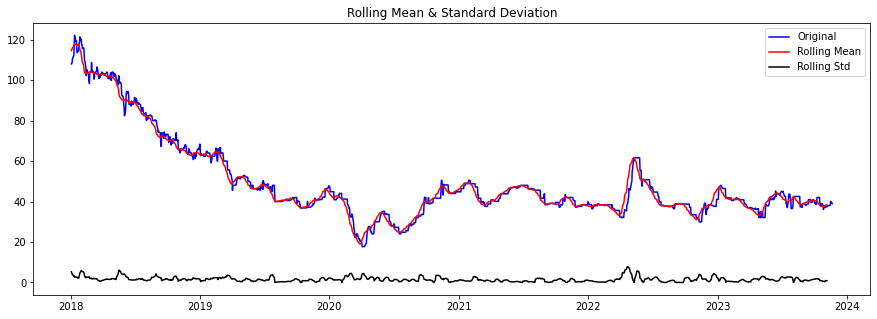

Results of Dickey-Fuller Test:
Test Statistic                    0.377944
p-value                           0.980651
#Lags Used                        1.000000
Number of Observations Used    1458.000000
Critical Value (1%)              -3.434843
Critical Value (5%)              -2.863524
Critical Value (10%)             -2.567826
dtype: float64


In [31]:
test_stationarity(data['Price'])

For the Price time series data,

Rolling Mean is clearly variable with time. It is very close to the data. Thus, it can be a good descriptor of the data.
    
Rolling Standard Deviation is consistent
    
Test Statistic : (0.3779) >

Critical Value (5%) : (-2.863)

p-value (0.98) > 0.05

__REMEBER__

For the Null Hypothesis to be rejected and accepting that the time series is stationary, there are 2 requirements :

Critical Value (5%) > Test Statistic

p-value < 0.05



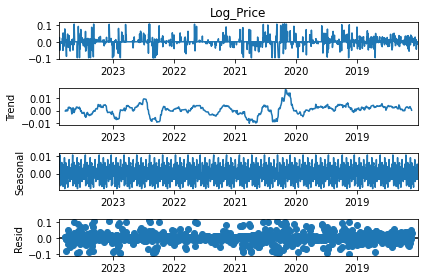

In [32]:
data['Log_Price'] = np.log(data['Price'])
data_log_diff = data['Log_Price'].diff()
data_log_diff = data_log_diff.dropna()

dec = sm.tsa.seasonal_decompose(data_log_diff,period = 52).plot()
plt.show()

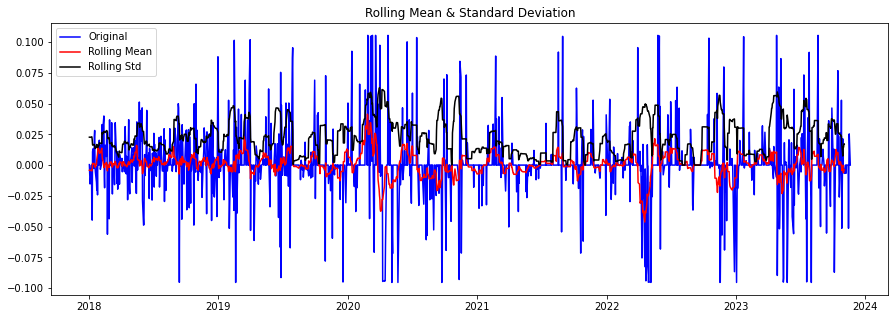

Results of Dickey-Fuller Test:
Test Statistic                  -34.394007
p-value                           0.000000
#Lags Used                        0.000000
Number of Observations Used    1458.000000
Critical Value (1%)              -3.434843
Critical Value (5%)              -2.863524
Critical Value (10%)             -2.567826
dtype: float64


In [33]:
test_stationarity(data_log_diff)

Critical Value (5%) : (-2.86) > Test Statistic : (-34.39). We can say that the time series is stationary

Test Statistic is less than Critical Value (1%).
   
0.05 > p-value (0.00)

From these outputs, we can reject the Null Hypothesis and accept the Alternate Hypothesis i.e we can say that the above time series is stationary.


In [34]:
def tsplot(data, lags=None, figsize=(12, 7), style='bmh'):
    if not isinstance(data, pd.Series):
        data = pd.Series(data)
        
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        data.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(data)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(data, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(data, lags=lags, ax=pacf_ax)
        plt.tight_layout()

C:\Users\GODIAN\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


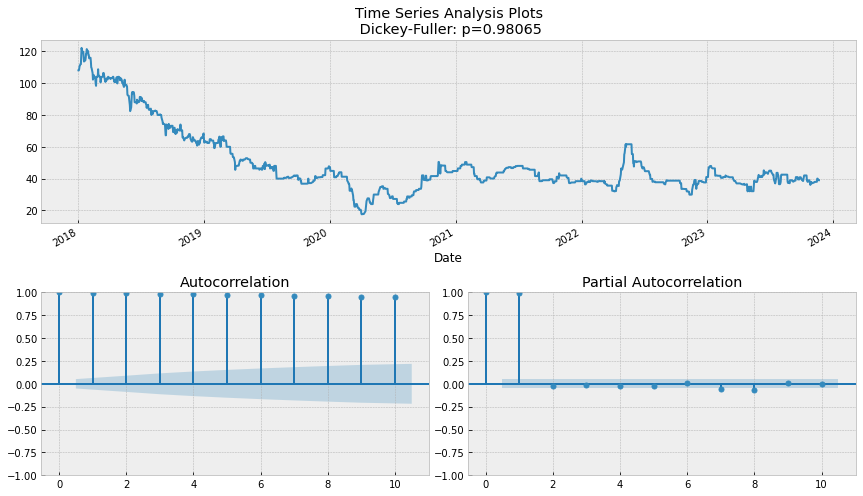

In [35]:
tsplot(data['Price'],lags = 10)

C:\Users\GODIAN\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


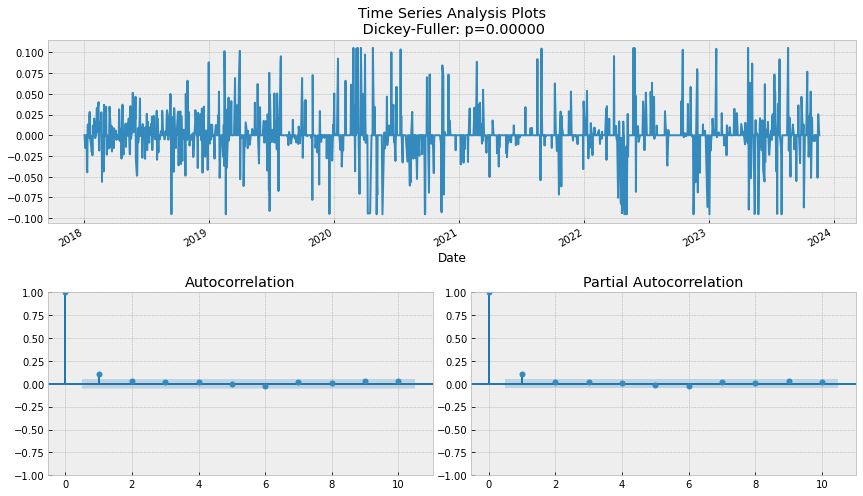

In [36]:
tsplot(data_log_diff,lags = 10)

## FORECASTING

### VAR

In [103]:
dfm = df.copy()

In [104]:
dfm.head()

,Date,Price,Open,High,Low,Vol.
0,11/21/2023,39.0,39.0,39.0,37.55,279130.0
1,11/20/2023,39.0,40.0,39.0,39.00,5420000.0
2,11/17/2023,40.0,40.0,39.0,38.50,442820.0
3,11/16/2023,40.0,38.0,40.0,38.00,2750000.0
4,11/15/2023,38.0,38.0,38.0,38.00,1550000.0


In [105]:
dfm['Date'] = pd.to_datetime(dfm['Date'])
dfm.set_index('Date', inplace=True)

In [106]:
dfm.head()

,Price,Open,High,Low,Vol.
Date,,,,,
2023-11-21,39.0,39.0,39.0,37.55,279130.0
2023-11-20,39.0,40.0,39.0,39.00,5420000.0
2023-11-17,40.0,40.0,39.0,38.50,442820.0
2023-11-16,40.0,38.0,40.0,38.00,2750000.0
2023-11-15,38.0,38.0,38.0,38.00,1550000.0


In [97]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
from tqdm import tqdm_notebook
from itertools import product

import warnings
warnings.filterwarnings('ignore')

In [107]:


ad_fuller_result_1 = adfuller(dfm['Price'].diff()[1:])

print('Price')
print(f'ADF Statistic: {ad_fuller_result_1[0]}')
print(f'p-value: {ad_fuller_result_1[1]}')

print('\n---------------------\n')

ad_fuller_result_2 = adfuller(dfm['Vol.'].diff()[1:])

print('Volume')
print(f'ADF Statistic: {ad_fuller_result_2[0]}')
print(f'p-value: {ad_fuller_result_2[1]}')
     


Price
ADF Statistic: -36.52136756072038
p-value: 0.0

---------------------

Volume
ADF Statistic: -15.523152884300972
p-value: 2.2699016137536454e-28


In [108]:
print('Price causes Volume?\n')
print('------------------')
granger_1 = grangercausalitytests(dfm[['Vol.', 'Price']], 4)

print('Volume causes Price?\n')
print('------------------')
granger_2 = grangercausalitytests(dfm[['Price', 'Vol.']], 4)

Price causes Volume?

------------------

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.6019  , p=0.1069  , df_denom=1456, df_num=1
ssr based chi2 test:   chi2=2.6073  , p=0.1064  , df=1
likelihood ratio test: chi2=2.6050  , p=0.1065  , df=1
parameter F test:         F=2.6019  , p=0.1069  , df_denom=1456, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=5.9531  , p=0.0027  , df_denom=1453, df_num=2
ssr based chi2 test:   chi2=11.9472 , p=0.0025  , df=2
likelihood ratio test: chi2=11.8985 , p=0.0026  , df=2
parameter F test:         F=5.9531  , p=0.0027  , df_denom=1453, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=4.9406  , p=0.0020  , df_denom=1450, df_num=3
ssr based chi2 test:   chi2=14.8934 , p=0.0019  , df=3
likelihood ratio test: chi2=14.8178 , p=0.0020  , df=3
parameter F test:         F=4.9406  , p=0.0020  , df_denom=1450, df_num=3

Granger Causality
number of lags (no zero) 4
s

In [109]:
dfm = dfm[['Price','Vol.']]
print(dfm.shape)

(1460, 2)


In [110]:
train_df=dfm[:-100]
test_df=dfm[-100:]

len(train_df)

1360

In [111]:
model = VAR(train_df.diff()[1:])

In [112]:
sorted_order=model.select_order(maxlags=20)
print(sorted_order.summary())

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        32.11       32.12   8.807e+13       32.11
1        31.96       31.98   7.574e+13       31.97
2        31.85      31.89*   6.799e+13       31.86
3        31.84       31.89   6.724e+13       31.86
4        31.82       31.89   6.598e+13       31.85
5        31.81       31.89   6.526e+13       31.84
6        31.79       31.90   6.430e+13      31.83*
7        31.79       31.91   6.397e+13       31.83
8        31.79       31.92   6.377e+13       31.84
9        31.78       31.93   6.355e+13       31.84
10       31.78       31.94   6.307e+13       31.84
11       31.77       31.95   6.300e+13       31.84
12       31.77       31.96   6.276e+13       31.84
13       31.77       31.98   6.303e+13       31.85
14       31.77       32.00   6.296e+13       31.86
15      31.77*       32.01  6.264e+13*       31.86
16       31.77       32.03   6.

In [113]:
var_model = VARMAX(train_df, order=(15,0),enforce_stationarity= True)
fitted_model = var_model.fit(disp=False)
print(fitted_model.summary())

                           Statespace Model Results                           
Dep. Variable:      ['Price', 'Vol.']   No. Observations:                 1360
Model:                        VAR(15)   Log Likelihood              -25363.417
                          + intercept   AIC                          50856.834
Date:                Wed, 22 Nov 2023   BIC                          51195.825
Time:                        11:22:29   HQIC                         50983.740
Sample:                             0                                         
                               - 1360                                         
Covariance Type:                  opg                                         
Ljung-Box (L1) (Q):             0.02, 0.00   Jarque-Bera (JB):   2205.82, 194050.76
Prob(Q):                        0.88, 0.99   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         1.46, 3.77   Skew:                       0.14, 6.05
Prob(H) (two-sided):            0.00,

In [114]:
n_forecast = 100
predict = fitted_model.get_prediction(start=len(train_df),end=len(train_df) + n_forecast-1)#start="1989-07-01",end='1999-01-01')

predictions=predict.predicted_mean

In [115]:
predictions.columns=['Price_P','Volume_P']
predictions

,Price_P,Volume_P
1360,92.151411,1.170442e+06
1361,91.830022,9.495314e+05
1362,91.499429,1.708887e+06
1363,91.218722,1.109698e+06
1364,90.928222,2.392335e+06
...,...,...
1455,86.903362,2.588452e+06
1456,86.850813,2.588878e+06
1457,86.798334,2.589304e+06
1458,86.745927,2.589729e+06


In [116]:
test_vs_pred=pd.concat([test_df,predictions],axis=1)

<AxesSubplot:>

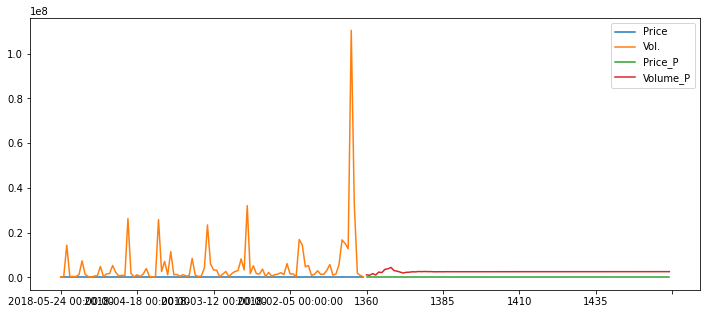

In [117]:
test_vs_pred.plot(figsize=(12,5))

In [118]:
from sklearn.metrics import mean_squared_error
import math 
from statistics import mean

rmse_price=math.sqrt(mean_squared_error(predictions['Price_P'],test_df['Price']))
print('Mean value of Price is : {}. Root Mean Squared Error is :{}'.format(mean(test_df['Price']),rmse_price))

rmse_volume=math.sqrt(mean_squared_error(predictions['Volume_P'],test_df['Vol.']))
print('Mean value of Volume is : {}. Root Mean Squared Error is :{}'.format(mean(test_df['Vol.']),rmse_volume))

Mean value of Price is : 106.0659. Root Mean Squared Error is :18.528634567964605
Mean value of Volume is : 5353779.7. Root Mean Squared Error is :12789692.411884017


In [119]:
dfm = dfm.resample(rule = 'M').mean()

In [120]:
dfm.head()

,Price,Vol.
Date,,
2018-01-31,115.837727,1.172253e+07
2018-02-28,107.204000,3.986718e+06
2018-03-31,103.299048,3.144846e+06
2018-04-30,102.392000,4.743586e+06
2018-05-31,97.885714,2.362581e+06


In [121]:
ad_fuller_result_1 = adfuller(dfm['Price'].diff()[1:])

print('Price')
print(f'ADF Statistic: {ad_fuller_result_1[0]}')
print(f'p-value: {ad_fuller_result_1[1]}')

print('\n---------------------\n')

ad_fuller_result_2 = adfuller(dfm['Vol.'].diff()[1:])

print('Volume')
print(f'ADF Statistic: {ad_fuller_result_2[0]}')
print(f'p-value: {ad_fuller_result_2[1]}')
     

Price
ADF Statistic: -6.498404872202618
p-value: 1.1784300730063937e-08

---------------------

Volume
ADF Statistic: -7.456029191951343
p-value: 5.509540485986873e-11


In [122]:
print('Price causes Volume?\n')
print('------------------')
granger_1 = grangercausalitytests(dfm[['Vol.', 'Price']], 4)

print('Volume causes Price?\n')
print('------------------')
granger_2 = grangercausalitytests(dfm[['Price', 'Vol.']], 4)

Price causes Volume?

------------------

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0013  , p=0.9711  , df_denom=67, df_num=1
ssr based chi2 test:   chi2=0.0014  , p=0.9704  , df=1
likelihood ratio test: chi2=0.0014  , p=0.9704  , df=1
parameter F test:         F=0.0013  , p=0.9711  , df_denom=67, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.5021  , p=0.6076  , df_denom=64, df_num=2
ssr based chi2 test:   chi2=1.0826  , p=0.5820  , df=2
likelihood ratio test: chi2=1.0742  , p=0.5844  , df=2
parameter F test:         F=0.5021  , p=0.6076  , df_denom=64, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.5924  , p=0.6223  , df_denom=61, df_num=3
ssr based chi2 test:   chi2=1.9812  , p=0.5763  , df=3
likelihood ratio test: chi2=1.9529  , p=0.5822  , df=3
parameter F test:         F=0.5924  , p=0.6223  , df_denom=61, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F t

In [123]:
train_df=dfm[:-12]
test_df=dfm[-12:]

len(train_df)

59

In [124]:
dfm.shape

(71, 2)

In [125]:
model = VAR(train_df.diff()[1:])

In [126]:
sorted_order=model.select_order(maxlags=10)
print(sorted_order.summary())

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        33.57       33.65   3.804e+14       33.60
1        33.36      33.60*   3.083e+14       33.45
2        33.22       33.61   2.690e+14       33.37
3       33.14*       33.68  2.472e+14*      33.34*
4        33.27       33.97   2.837e+14       33.53
5        33.39       34.25   3.222e+14       33.71
6        33.41       34.42   3.328e+14       33.79
7        33.55       34.72   3.879e+14       33.99
8        33.66       34.99   4.440e+14       34.16
9        33.77       35.25   5.091e+14       34.33
10       33.70       35.34   4.916e+14       34.32
--------------------------------------------------


In [127]:
var_model = VARMAX(train_df, order=(3,0),enforce_stationarity= True)
fitted_model = var_model.fit(disp=False)
print(fitted_model.summary())

                           Statespace Model Results                           
Dep. Variable:      ['Price', 'Vol.']   No. Observations:                   59
Model:                         VAR(3)   Log Likelihood               -1138.709
                          + intercept   AIC                           2311.418
Date:                Wed, 22 Nov 2023   BIC                           2346.736
Time:                        11:24:15   HQIC                          2325.205
Sample:                    01-31-2018                                         
                         - 11-30-2022                                         
Covariance Type:                  opg                                         
Ljung-Box (L1) (Q):             0.94, 0.11   Jarque-Bera (JB):         61.58, 35.83
Prob(Q):                        0.33, 0.74   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         1.14, 1.11   Skew:                       0.91, 1.53
Prob(H) (two-sided):            0.77,

In [128]:
n_forecast = 12
predict = fitted_model.get_prediction(start=len(train_df),end=len(train_df) + n_forecast-1)#start="1989-07-01",end='1999-01-01')

predictions=predict.predicted_mean

In [129]:
predictions.columns=['Price_P','Volume_P']
predictions

,Price_P,Volume_P
2022-12-31,33.377839,2.467368e+06
2023-01-31,34.417656,2.777395e+06
2023-02-28,36.402138,3.353504e+06
2023-03-31,38.520405,3.591494e+06
2023-04-30,40.694233,3.876518e+06
2023-05-31,43.012834,4.049182e+06
2023-06-30,45.294129,4.159253e+06
2023-07-31,47.498498,4.263058e+06
2023-08-31,49.551416,4.315550e+06
2023-09-30,51.412804,4.348328e+06


In [130]:
test_vs_pred=pd.concat([test_df,predictions],axis=1)

<AxesSubplot:>

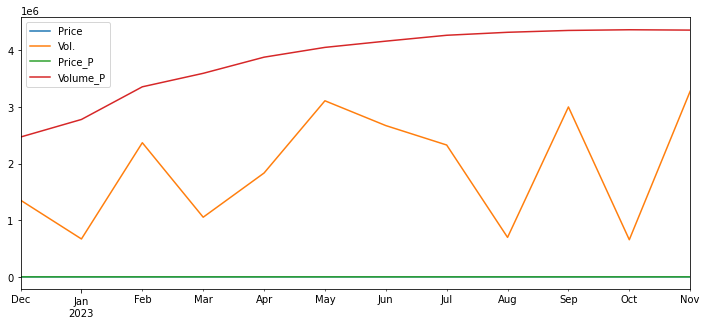

In [131]:
test_vs_pred.plot(figsize=(12,5))

In [132]:
from sklearn.metrics import mean_squared_error
import math 
from statistics import mean

rmse_price=math.sqrt(mean_squared_error(predictions['Price_P'],test_df['Price']))
print('Mean value of Price is : {}. Root Mean Squared Error is :{}'.format(mean(test_df['Price']),rmse_price))

rmse_volume=math.sqrt(mean_squared_error(predictions['Volume_P'],test_df['Vol.']))
print('Mean value of Volume is : {}. Root Mean Squared Error is :{}'.format(mean(test_df['Vol.']),rmse_volume))

Mean value of Price is : 39.805816675974356. Root Mean Squared Error is :8.934793202360193
Mean value of Volume is : 1916700.7416718882. Root Mean Squared Error is :2120588.9433284


### ARIMA



- ARIMA model is a combination of 3 models :
          AR (p) : Auto Regressive
          I (d) : Integrated
          MA (q) : Moving Average

- (p,d,q) is known as the order of the ARIMA model. Values of these parameters are based on the above mentioned models.
          p : Number of auto regressive terms.
          d : Number of differencing orders required to make the time series stationary.
          q : Number of lagged forecast errors in the prediction equation.


In [44]:
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,11/21/2023,39.0,39.0,39.0,37.55,279130.0,0.00%
1,11/20/2023,39.0,40.0,39.0,39.00,5420000.0,-2.50%
2,11/17/2023,40.0,40.0,39.0,38.50,442820.0,0.00%
3,11/16/2023,40.0,38.0,40.0,38.00,2750000.0,5.26%
4,11/15/2023,38.0,38.0,38.0,38.00,1550000.0,0.00%


In [45]:
dfa = df[['Date', 'Price', 'Open','High','Low', 'Vol.']]

In [46]:
dfa.tail()

,Date,Price,Open,High,Low,Vol.
1455,01/08/2018,112.00,115.15,115.20,112.00,110370000.0
1456,01/05/2018,110.48,111.99,112.01,109.60,32880000.0
1457,01/04/2018,108.80,108.00,109.20,108.00,1900000.0
1458,01/03/2018,108.00,106.80,108.51,106.80,894230.0
1459,01/02/2018,108.04,107.96,108.20,107.96,252210.0


In [47]:
dfa['Date'] = pd.to_datetime(dfa['Date'])
dfa.set_index('Date', inplace=True)

C:\Users\GODIAN\AppData\Local\Temp\ipykernel_16036\91874450.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa['Date'] = pd.to_datetime(dfa['Date'])


In [48]:
dfa.tail()

,Price,Open,High,Low,Vol.
Date,,,,,
2018-01-08,112.00,115.15,115.20,112.00,110370000.0
2018-01-05,110.48,111.99,112.01,109.60,32880000.0
2018-01-04,108.80,108.00,109.20,108.00,1900000.0
2018-01-03,108.00,106.80,108.51,106.80,894230.0
2018-01-02,108.04,107.96,108.20,107.96,252210.0


In [49]:
dfa = dfa[::-1]

In [50]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(dfa['Price'], trace=True,
suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=4852.401, Time=2.65 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4847.321, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4846.521, Time=0.30 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4846.489, Time=0.32 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4847.337, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4848.440, Time=0.43 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=4848.451, Time=0.42 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=4850.438, Time=0.60 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=4846.339, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=4848.310, Time=0.16 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=4848.318, Time=0.18 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=4846.366, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=4850.309, Time=0.19 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 5.664 seconds


In [51]:
print(dfa.shape)
train=dfa.iloc[:-100]
test=dfa.iloc[-100:]
print(train.shape,test.shape)

(1460, 5)
(1360, 5) (100, 5)


In [52]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(dfa['Price'],order=(0,1,1))
model=model.fit()
model.summary()

C:\Users\GODIAN\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\GODIAN\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\GODIAN\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Price   No. Observations:                 1460
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -2421.170
Date:                Wed, 22 Nov 2023   AIC                           4846.339
Time:                        10:40:26   BIC                           4856.910
Sample:                             0   HQIC                          4850.283
                               - 1460                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0455      0.018      2.466      0.014       0.009       0.082
sigma2         1.6178      0.031     51.956      0.000       1.557       1.679
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1787.90
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.53   Skew:                            -0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [53]:
dfa.head()

,Price,Open,High,Low,Vol.
Date,,,,,
2018-01-02,108.04,107.96,108.20,107.96,252210.0
2018-01-03,108.00,106.80,108.51,106.80,894230.0
2018-01-04,108.80,108.00,109.20,108.00,1900000.0
2018-01-05,110.48,111.99,112.01,109.60,32880000.0
2018-01-08,112.00,115.15,115.20,112.00,110370000.0


In [54]:
dfa.tail()

,Price,Open,High,Low,Vol.
Date,,,,,
2023-11-15,38.0,38.0,38.0,38.00,1550000.0
2023-11-16,40.0,38.0,40.0,38.00,2750000.0
2023-11-17,40.0,40.0,39.0,38.50,442820.0
2023-11-20,39.0,40.0,39.0,39.00,5420000.0
2023-11-21,39.0,39.0,39.0,37.55,279130.0


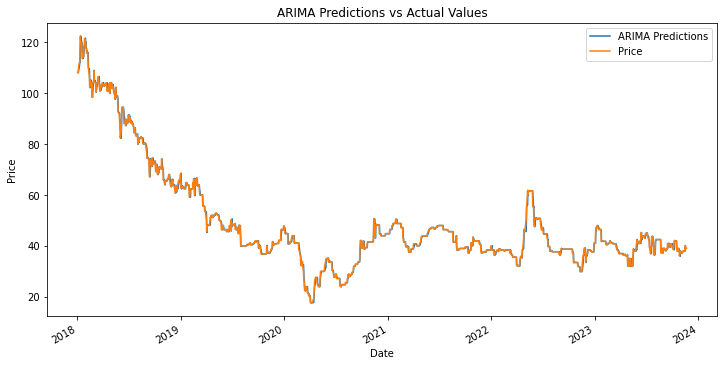

In [55]:
# Set the start and end indices based on the date range you want
start_index = dfa.index.get_loc('2018-01-04')
end_index = dfa.index.get_loc('2023-11-17')

# Make predictions
pred = model.predict(start=start_index, end=end_index, typ='levels').rename('ARIMA Predictions')

# Plotting
plt.figure(figsize=(12, 6))
pred.plot(legend=True)
dfa['Price'].plot(legend=True)
plt.title('ARIMA Predictions vs Actual Values')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [56]:
dfa['predictions'] = pred

In [57]:
dfa.head(20)

,Price,Open,High,Low,Vol.,predictions
Date,,,,,,
2018-01-02,108.04,107.96,108.20,107.96,252210.0,NaN
2018-01-03,108.00,106.80,108.51,106.80,894230.0,NaN
2018-01-04,108.80,108.00,109.20,108.00,1900000.0,107.998183
2018-01-05,110.48,111.99,112.01,109.60,32880000.0,108.836492
2018-01-08,112.00,115.15,115.20,112.00,110370000.0,110.554799
2018-01-09,112.00,112.01,115.20,112.00,12830000.0,112.065773
2018-01-10,116.80,115.19,117.48,112.00,15180000.0,111.997007
2018-01-11,122.14,119.60,122.64,119.60,16770000.0,117.018592
2018-01-12,120.84,127.20,124.00,120.84,5750000.0,122.373084


In [58]:
dfa.tail(20)

,Price,Open,High,Low,Vol.,predictions
Date,,,,,,
2023-10-25,38.00,39.00,38.00,38.00,678520.0,38.997933
2023-10-26,38.00,38.00,37.90,36.65,633220.0,37.954582
2023-10-27,36.05,38.00,36.05,36.05,458130.0,38.002067
2023-10-30,37.95,36.05,37.95,36.25,1460000.0,35.961158
2023-10-31,37.15,37.95,38.90,37.15,779720.0,38.040515
2023-11-01,37.15,37.15,37.75,36.15,846490.0,37.109471
2023-11-02,37.15,37.15,37.95,37.00,1550000.0,37.151845
2023-11-03,37.25,37.15,38.35,37.25,5760000.0,37.149916
2023-11-06,37.50,37.25,38.00,37.45,4930000.0,37.254555


In [59]:
from sklearn.metrics import mean_squared_error
from math import sqrt
dfa['Price'].mean()
rmse=sqrt(mean_squared_error(pred,dfa['Price'].iloc[2 : 1458]))
print(rmse)

1.2729677965436021


__Root Mean Squared Error (RMSE)__ is a measure of the average deviation of predicted values from the actual values. In the context of time series forecasting, RMSE is often used to evaluate the accuracy of a forecasting model.

In this case, an __RMSE of 1.2729677965436021__ means that, on average, the predictions made by our model deviate from the actual values by approximately 1.27 units. The lower the RMSE, the better the model's performance, as it indicates smaller errors between predicted and actual values.

In [60]:
from pandas.tseries.offsets import DateOffset
future_dates=[dfa.index[-1]+ DateOffset(days=x)for x in range(0,20)]

In [61]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=dfa.columns)

In [62]:
future_datest_df.tail()

,Price,Open,High,Low,Vol.,predictions
2023-12-06,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-07,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-08,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-09,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-10,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
future_df=pd.concat([dfa,future_datest_df])
future_df.head()

,Price,Open,High,Low,Vol.,predictions
2018-01-02,108.04,107.96,108.2,107.96,252210.0,NaN
2018-01-03,108.0,106.8,108.51,106.8,894230.0,NaN
2018-01-04,108.8,108.0,109.2,108.0,1900000.0,107.998183
2018-01-05,110.48,111.99,112.01,109.6,32880000.0,108.836492
2018-01-08,112.0,115.15,115.2,112.0,110370000.0,110.554799


In [64]:
(future_df.shape), (dfa.shape)

((1479, 6), (1460, 6))

C:\Users\GODIAN\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


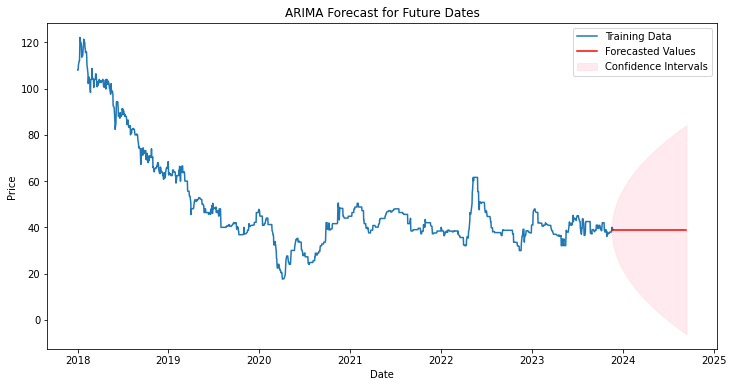

             forecast
2023-11-17  39.002063
2023-11-18  39.002063
2023-11-19  39.002063
2023-11-20  39.002063
2023-11-21  39.002063
...               ...
2024-09-07  39.002063
2024-09-08  39.002063
2024-09-09  39.002063
2024-09-10  39.002063
2024-09-11  39.002063

[300 rows x 1 columns]


In [73]:
# Set the number of periods you want to forecast into the future
forecast_periods = 300  # Adjust this based on your desired forecast horizon

# Get the forecast results
forecast_results = model.get_forecast(steps=forecast_periods)

# Extract the forecasted values and confidence intervals
forecast_values = forecast_results.predicted_mean
confidence_intervals = forecast_results.conf_int()

# Create a DataFrame for the forecasted values
future_df = pd.DataFrame(index=pd.date_range(start='2023-11-17', periods=forecast_periods, freq='D'))
future_df['forecast'] = forecast_values.values

# Plot the forecasted values and confidence intervals
plt.figure(figsize=(12, 6))
plt.plot(dfa.index, dfa['Price'], label='Training Data')  # Plot training data
plt.plot(future_df.index, future_df['forecast'], label='Forecasted Values', color='red')  # Plot forecast
plt.fill_between(future_df.index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='pink', alpha=0.3, label='Confidence Intervals')
plt.title('ARIMA Forecast for Future Dates')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Display the forecast DataFrame
print(future_df)


In [ ]:
df

In [74]:
future_df.head()

,forecast
2023-11-17,39.002063
2023-11-18,39.002063
2023-11-19,39.002063
2023-11-20,39.002063
2023-11-21,39.002063


In [75]:
model=sm.tsa.statespace.SARIMAX(dfa['Price'],order=(0, 1, 1),seasonal_order=(0,1,1,12))
results=model.fit()

C:\Users\GODIAN\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\GODIAN\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [76]:
future_dates=[dfa.index[-1]+ DateOffset(days=x)for x in range(0,20)]

C:\Users\GODIAN\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


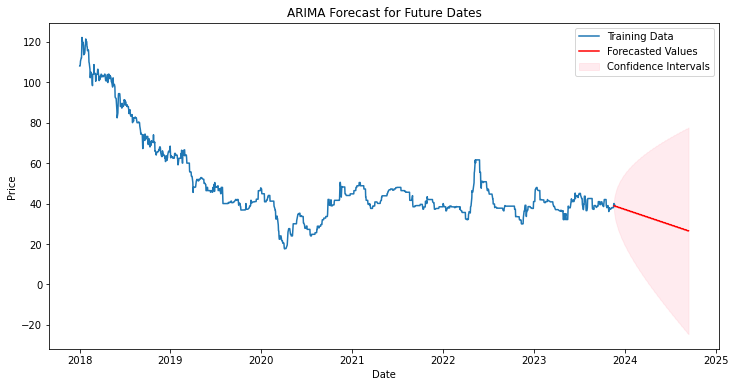

             forecast
2023-11-17  38.878488
2023-11-18  38.932465
2023-11-19  38.931035
2023-11-20  38.813906
2023-11-21  38.647285
...               ...
2024-09-07  26.568379
2024-09-08  26.579119
2024-09-09  26.566436
2024-09-10  26.604310
2024-09-11  26.558362

[300 rows x 1 columns]


In [77]:
# Assuming 'model' is your fitted ARIMA model

# Set the number of periods you want to forecast into the future
forecast_periods = 300  # Adjust this based on your desired forecast horizon

# Get the forecast results
forecast_results = results.get_forecast(steps=forecast_periods)

# Extract the forecasted values and confidence intervals
forecast_values = forecast_results.predicted_mean
confidence_intervals = forecast_results.conf_int()

# Create a DataFrame for the forecasted values
future_df = pd.DataFrame(index=pd.date_range(start='2023-11-17', periods=forecast_periods, freq='D'))
future_df['forecast'] = forecast_values.values

# Plot the forecasted values and confidence intervals
plt.figure(figsize=(12, 6))
plt.plot(dfa.index, dfa['Price'], label='Training Data')  # Plot training data
plt.plot(future_df.index, future_df['forecast'], label='Forecasted Values', color='red')  # Plot forecast
plt.fill_between(future_df.index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='pink', alpha=0.3, label='Confidence Intervals')
plt.title('ARIMA Forecast for Future Dates')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Display the forecast DataFrame
print(future_df)


In [79]:
future_df.head(10)

,forecast
2023-11-17,38.878488
2023-11-18,38.932465
2023-11-19,38.931035
2023-11-20,38.813906
2023-11-21,38.647285
2023-11-22,38.558861
2023-11-23,38.535079
2023-11-24,38.516191
2023-11-25,38.526931
2023-11-26,38.514248


VOLUME FORECAST

In [82]:
dfa.head()

,Price,Open,High,Low,Vol.,predictions
Date,,,,,,
2018-01-02,108.04,107.96,108.20,107.96,252210.0,NaN
2018-01-03,108.00,106.80,108.51,106.80,894230.0,NaN
2018-01-04,108.80,108.00,109.20,108.00,1900000.0,107.998183
2018-01-05,110.48,111.99,112.01,109.60,32880000.0,108.836492
2018-01-08,112.00,115.15,115.20,112.00,110370000.0,110.554799


In [83]:
stepwise_fit = auto_arima(dfa['Vol.'], trace=True,
suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=50079.053, Time=2.31 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=50682.443, Time=0.15 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=50464.541, Time=0.18 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=50162.079, Time=0.67 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=50680.443, Time=0.12 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=50096.544, Time=1.79 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=50071.858, Time=1.55 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=50070.338, Time=1.12 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=50094.079, Time=0.95 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=50314.671, Time=0.36 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=50053.603, Time=1.25 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=50158.025, Time=0.53 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=50462.541, Time=0.14 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=50054.105, Time=1.66 sec
 ARIMA(1,1,2)(0,0,0

In [ ]:
model=sm.tsa.statespace.SARIMAX(dfa['Vol.'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

C:\Users\GODIAN\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


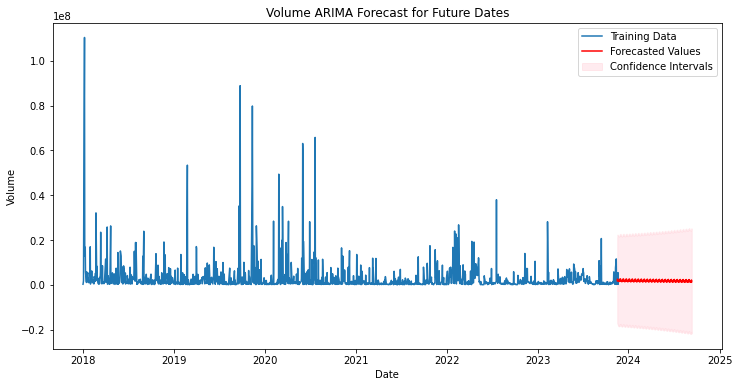

                forecast
2023-11-17  1.848443e+06
2023-11-18  2.542428e+06
2023-11-19  2.209167e+06
2023-11-20  1.812600e+06
2023-11-21  1.940772e+06
...                  ...
2024-09-07  1.185422e+06
2024-09-08  1.129253e+06
2024-09-09  1.648063e+06
2024-09-10  2.148168e+06
2024-09-11  1.404802e+06

[300 rows x 1 columns]


In [85]:
# Assuming 'model' is your fitted ARIMA model

# Set the number of periods you want to forecast into the future
forecast_periods = 300  # Adjust this based on your desired forecast horizon

# Get the forecast results
forecast_results = results.get_forecast(steps=forecast_periods)

# Extract the forecasted values and confidence intervals
forecast_values = forecast_results.predicted_mean
confidence_intervals = forecast_results.conf_int()

# Create a DataFrame for the forecasted values
future_df = pd.DataFrame(index=pd.date_range(start='2023-11-17', periods=forecast_periods, freq='D'))
future_df['forecast'] = forecast_values.values

# Plot the forecasted values and confidence intervals
plt.figure(figsize=(12, 6))
plt.plot(dfa.index, dfa['Vol.'], label='Training Data')  # Plot training data
plt.plot(future_df.index, future_df['forecast'], label='Forecasted Values', color='red')  # Plot forecast
plt.fill_between(future_df.index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='pink', alpha=0.3, label='Confidence Intervals')
plt.title('Volume ARIMA Forecast for Future Dates')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

# Display the forecast DataFrame
print(future_df)


In [86]:
future_df.head(10)

,forecast
2023-11-17,1.848443e+06
2023-11-18,2.542428e+06
2023-11-19,2.209167e+06
2023-11-20,1.812600e+06
2023-11-21,1.940772e+06
2023-11-22,1.603008e+06
2023-11-23,1.576516e+06
2023-11-24,1.502893e+06
2023-11-25,1.464881e+06
2023-11-26,1.942935e+06
